# Beispiel 1: Einfache Visualisierungen der Elektrizitaetsbilanz

### Datenvisualisierung mit Python/Matplotlib

### Datenbeispiel: Stromproduktion in der Schweiz

Datenquelle: Bundesamt für Energie
Webseite: https://opendata.swiss/de/dataset/schweizerische-elektrizitatsstatistik-schweizerische-elektrizitatsbilanz-monatswerte

Zeitpunkt der Abfrage: 03.10.2024

Format: CSV (.csv)

## 1. Einlesen und Organisation der Daten

Zum importieren von CSV-Files kann das Modul Pandas verwendet werden.
https://pandas.pydata.org/


Installieren mit Anaconda (im Anaconda Prompt (Windows) oder Terminal (Linux oder MacOS):

    conda install pandas


#### Modul Pandas importieren

In [1]:
#Pandas importieren
import pandas as pd

#### Datenfile lesen und anzeigen

Pandas stellt Reader für verschiedene Formate zur Verfügung. Der entsprechende Reader read_csv() wird ausgewählt und bekommt als parameter den Filenamen. Die Daten werden dann im Dataframe df gespeichert.

In [2]:
# CSV-file lesen
df = pd.read_csv('ogd35_schweizerische_elektrizitaetsbilanz_monatswerte.csv')

In [3]:
# Eingelesene Daten anzeigen
df

,Jahr,Monat,Definitiv,Erzeugung_laufwerk_GWh,Erzeugung_speicherwerk_GWh,Erzeugung_kernkraftwerk_GWh,Erzeugung_andere_GWh,Verbrauch_speicherpumpen_GWh,Erzeugung_netto_GWh,Einfuhr_GWh,Ausfuhr_GWh,Landesverbrauch_GWh,Verluste_GWh,Endverbrauch_GWh
0,2000,1,1,891,2004,2354,238,72,5415,2580,2521,5474,346,5128
1,2000,2,1,959,1516,2213,232,40,4880,2478,2337,5021,353,4668
2,2000,3,1,1069,1463,2355,229,44,5072,2608,2596,5084,347,4737
3,2000,4,1,1196,1068,2278,218,139,4621,2181,2375,4427,334,4093
4,2000,5,1,2060,1920,2307,197,228,6256,1212,3034,4434,315,4119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2024,3,1,1204,2170,2194,712,232,6048,2473,3174,5347,370,4977
291,2024,4,1,1574,1847,2013,872,468,5838,1836,2722,4952,376,4576
292,2024,5,1,2158,2252,808,975,438,5755,1991,2987,4759,341,4418
293,2024,6,1,2310,2623,1251,995,632,6547,1513,3459,4601,308,4293


#### Struktur der Dataframes

Datenstruktur: Dictionnary; die Spalten des CSV-files sind über Keys() zugänglich

In [4]:
# Verfügbare Keys anzeigen lassen
df.keys()

Index(['Jahr', 'Monat', 'Definitiv', 'Erzeugung_laufwerk_GWh',
       'Erzeugung_speicherwerk_GWh', 'Erzeugung_kernkraftwerk_GWh',
       'Erzeugung_andere_GWh', 'Verbrauch_speicherpumpen_GWh',
       'Erzeugung_netto_GWh', 'Einfuhr_GWh', 'Ausfuhr_GWh',
       'Landesverbrauch_GWh', 'Verluste_GWh', 'Endverbrauch_GWh'],
      dtype='object')

In [5]:
# Eine bestimmte Spalte auswählen
df['Endverbrauch_GWh']

0      5128
1      4668
2      4737
3      4093
4      4119
       ... 
290    4977
291    4576
292    4418
293    4293
294    4295
Name: Endverbrauch_GWh, Length: 295, dtype: int64

In [6]:
# Jeden 12. Datenpunkt einer Spalte auswählen (jeweils erster Monat im Jahr)
df['Endverbrauch_GWh'][::12]

0      5128
12     5165
24     5403
36     5360
48     5408
60     5538
72     5760
84     5409
96     5604
108    5856
120    5850
132    5821
144    5740
156    5792
168    5659
180    5800
192    5655
204    6147
216    5539
228    5838
240    5511
252    5770
264    5781
276    5533
288    5605
Name: Endverbrauch_GWh, dtype: int64

## 2. Visualisierung der Elektrizitätsbilanz

Die Zeitreihen von Erzeugung, Verbrauch u.s.w. in den verschiedenen Spalten können nun zusammen oder separat visualisiert werden.

#### Notwendige Module importieren

In [7]:
# Matplotlib zum erstellen der Grafiken
import matplotlib.pyplot as plt

### Visualisierung 1: Eine Zeitreihe visualisieren

Die Stromproduktion jedes Energieträgers über die Zeit ist eine Zeitreihe. 

<Figure size 640x500 with 0 Axes>

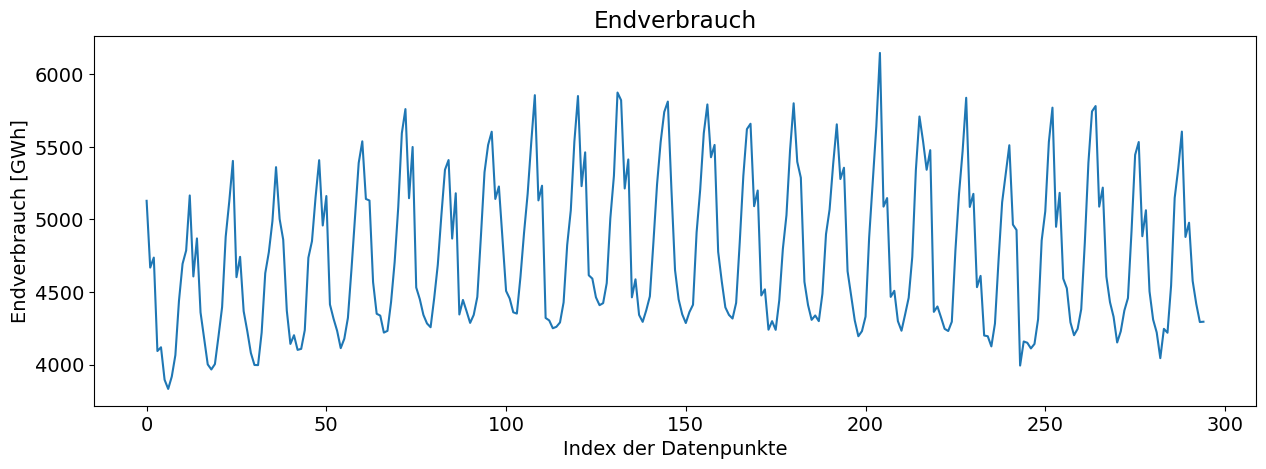

In [8]:
# Visualisierung der des Endverbrauchs
plt.figure().set_figheight(5) # Höhe des Plots
plt.figure().set_figwidth(15) # Breite des Plots
plt.rcParams.update({'font.size': 14}) # Schriftgrösse definieren

plt.plot(df['Endverbrauch_GWh']) # Plotten der Stromproduktion nach Datum

plt.xlabel('Index der Datenpunkte') # Beschriftung x-Achse
plt.ylabel('Endverbrauch [GWh]') # Beschriftung y-Achse

plt.title("Endverbrauch") # Titel des Plots

plt.show()

### Visualisierung 2: Mehrere Zeitreihen visualisieren

Um mehrere Zeitreihen zu vergleichen müssen diese in einem Plot kombiniert werden.

<Figure size 640x500 with 0 Axes>

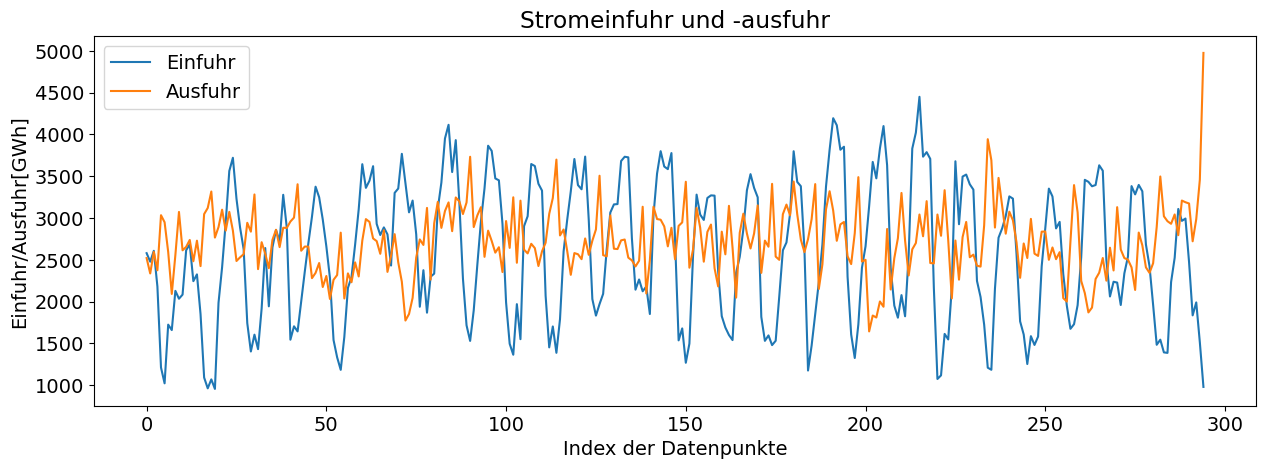

In [9]:
# Visualisierung von Einfuhr und Ausfuhr
plt.figure().set_figheight(5) # Höhe des Plots
plt.figure().set_figwidth(15) # Breite des Plots
plt.rcParams.update({'font.size': 14}) # Schriftgrösse definieren

plt.plot(df['Einfuhr_GWh']) # Plotten der Stromproduktion nach Datum
plt.plot(df['Ausfuhr_GWh']) # Plotten der Stromproduktion nach Datum

plt.xlabel('Index der Datenpunkte') # Beschriftung x-Achse
plt.ylabel('Einfuhr/Ausfuhr[GWh]') # Beschriftung y-Achse

plt.legend(['Einfuhr', 'Ausfuhr'])

plt.title("Stromeinfuhr und -ausfuhr") # Titel des Plots

plt.show()

Visualisierung der Daten in mehreren Subplots: die einzelnen Datensätze sind so gut zu erkennen.

### Visualisierung 3: Endverbrauch gegen Jahr auftragen

Zur Vereinfachung wird dafür hier nur jeder 12. Datenpunkt verwendet, jeweils der erste Monat des Jahres.

<Figure size 640x500 with 0 Axes>

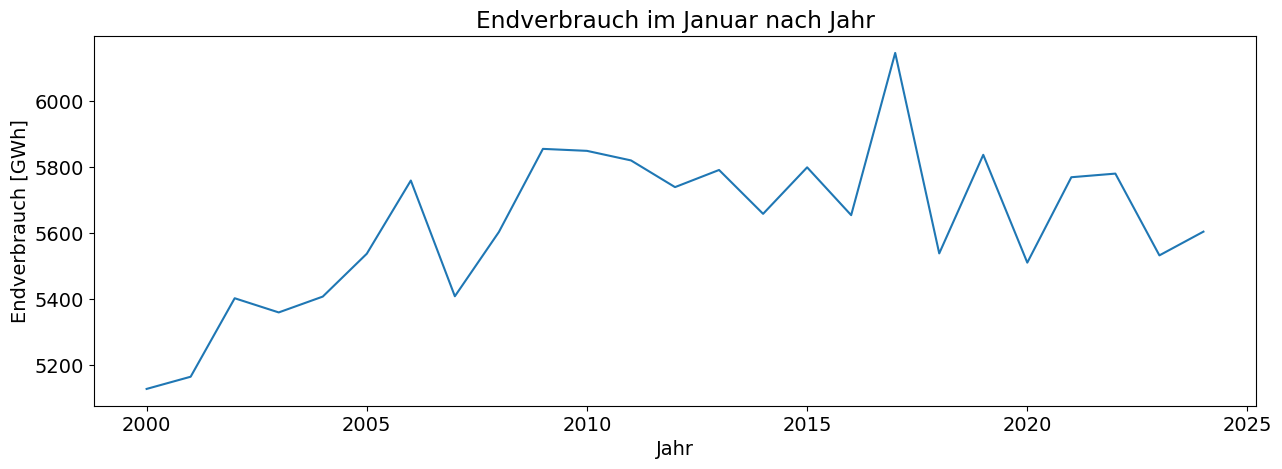

In [10]:
# Visualisierung der des Endverbrauchs
plt.figure().set_figheight(5) # Höhe des Plots
plt.figure().set_figwidth(15) # Breite des Plots
plt.rcParams.update({'font.size': 14}) # Schriftgrösse definieren

plt.plot(df['Jahr'][::12], df['Endverbrauch_GWh'][::12]) # Plotten der Stromproduktion nach Datum

plt.xlabel('Jahr') # Beschriftung x-Achse
plt.ylabel('Endverbrauch [GWh]') # Beschriftung y-Achse

plt.title("Endverbrauch im Januar nach Jahr") # Titel des Plots

plt.show()

### Visualisierung 4: Erzeugung, Einfuhr, Ausfuhr und Endverbrauch gegen Jahr auftragen

Zur Vereinfachung wird dafür hier nur jeder 12. Datenpunkt verwendet, jeweils der erste Monat des Jahres.

<Figure size 640x500 with 0 Axes>

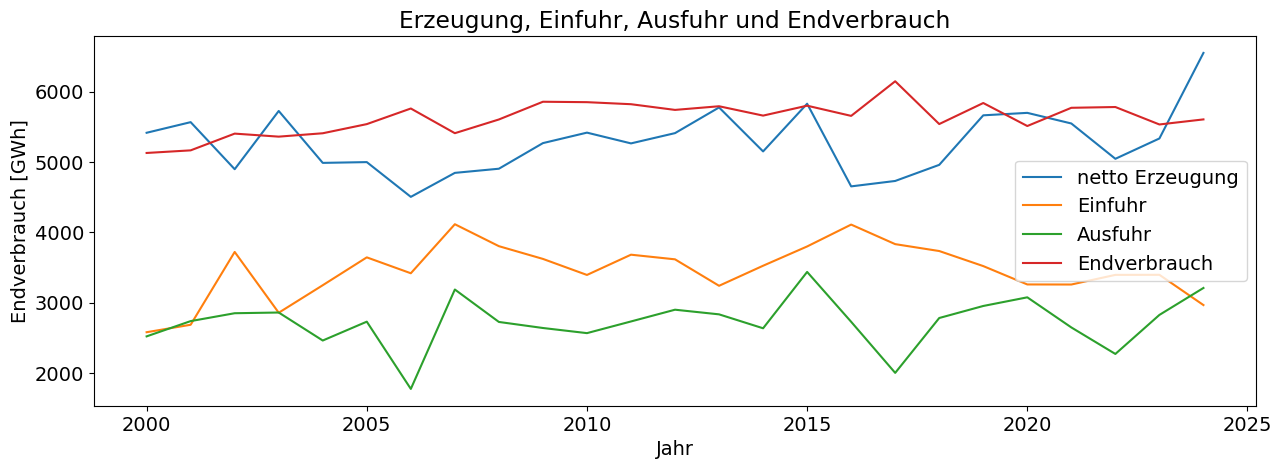

In [11]:
# Visualisierung der des Endverbrauchs
plt.figure().set_figheight(5) # Höhe des Plots
plt.figure().set_figwidth(15) # Breite des Plots
plt.rcParams.update({'font.size': 14}) # Schriftgrösse definieren

plt.plot(df['Jahr'][::12], df['Erzeugung_netto_GWh'][::12]) # Plotten der Stromproduktion nach Datum
plt.plot(df['Jahr'][::12], df['Einfuhr_GWh'][::12]) # Plotten der Stromproduktion nach Datum
plt.plot(df['Jahr'][::12], df['Ausfuhr_GWh'][::12]) # Plotten der Stromproduktion nach Datum
plt.plot(df['Jahr'][::12], df['Endverbrauch_GWh'][::12]) # Plotten der Stromproduktion nach Datum

plt.xlabel('Jahr') # Beschriftung x-Achse
plt.ylabel('Endverbrauch [GWh]') # Beschriftung y-Achse

plt.legend(['netto Erzeugung', 'Einfuhr', 'Ausfuhr', 'Endverbrauch'])

plt.title("Erzeugung, Einfuhr, Ausfuhr und Endverbrauch") # Titel des Plots

plt.show()